In [1]:
import pandas as pd

df = pd.read_csv('./data/SanDiegoWeather.csv')

# remove duplicate timepoints
df.drop_duplicates('dt', inplace=True)

# get substring YYYY-MM
df['Month'] = [ s[0:7] for s in df['dt_iso'] ]

# data from 2016-05 and beyond; selected columns only
df = df.loc[ df['Month'] >= '2016-05', ['dt','dt_iso','rain_1h', 'rain_3h','Month'] ]
df.fillna(0,inplace=True)

# it appears that rain_3h values should actually be placed in column rain_1h 
# get max between 'rain_1h', 'rain_3h'
df['rain_1h'] = df[['rain_1h','rain_3h']].max(axis=1)

del df['rain_3h']

df.head()


,dt,dt_iso,rain_1h,Month
21070,1462060800,2016-05-01 00:00:00 +0000 UTC,0.0,2016-05
21071,1462064400,2016-05-01 01:00:00 +0000 UTC,0.0,2016-05
21072,1462068000,2016-05-01 02:00:00 +0000 UTC,0.0,2016-05
21073,1462071600,2016-05-01 03:00:00 +0000 UTC,0.0,2016-05
21074,1462075200,2016-05-01 04:00:00 +0000 UTC,0.0,2016-05


In [2]:
# get total rain by Month
gb = df.groupby('Month')['rain_1h'].sum()

df2 = pd.DataFrame(gb)
df2.rename(columns={'rain_1h':'Total Rain (mm)'}, inplace=True)
df2


,Total Rain (mm)
Month,
2016-05,18.460000
2016-06,4.565000
2016-07,0.000000
2016-08,0.962500
2016-09,26.150000
2016-10,17.002500
2016-11,0.945000
2016-12,0.290000
2017-01,7.420000


In [3]:
# get total number of pothole repair requests per month
pothole_df = pd.read_csv("data/20190228_get_it_done_pothole_requests_datasd.csv")

# remove duplicated service requests
print(len(pothole_df))
pothole_df.drop_duplicates(['lat','long','district','case_origin'],inplace=True)
print(len(pothole_df))

# get substring YYYY-MM
pothole_df['Month'] = [ s[0:7] for s in pothole_df['requested_datetime'] ]
pothole_reports = pd.DataFrame(pothole_df.groupby('Month')['Month'].count())
pothole_reports.rename(columns={'Month':'Service Requests'}, inplace=True)
pothole_reports = pothole_reports.loc['2016-05':'2019-02']
pothole_reports

48305
44582


,Service Requests
Month,
2016-05,226
2016-06,830
2016-07,454
2016-08,442
2016-09,556
2016-10,484
2016-11,542
2016-12,1035
2017-01,6070


In [6]:
new_df = pd.read_csv('./data/san-diego-rain-data.csv')
new_df.head()

,Month,Rain (in),Rain (mm)
0,2016-05,0.44,11.176
1,2016-06,0.00,0.000
2,2016-07,0.00,0.000
3,2016-08,0.00,0.000
4,2016-09,0.32,8.128


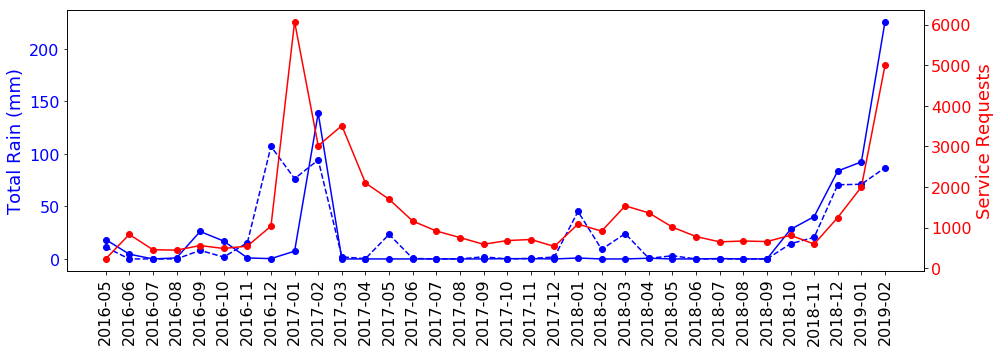

In [31]:
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots(figsize=(14,5))

x1 = list(range(len(df2)))
y1 = df2['Total Rain (mm)']

x2 = list(range(len(pothole_reports)))
y2 = pothole_reports['Service Requests']

ax1.set_ylabel('Total Rain (mm)', color='blue', fontsize=18)
ax1.plot(x1,y1,marker='o', color='blue')
#ax1.set_xticklabels(df2.index, rotation='vertical')
plt.xticks(x1,df2.index,rotation='vertical', fontsize=16)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=16)

y3 = new_df['Rain (mm)']
ax1.plot(x1, y3, '--ob')

ax2 = ax1.twinx()

ax2.set_ylabel('Service Requests', color='red', fontsize=18)
ax2.plot(x2,y2,marker='o', color='red')
ax2.tick_params(axis='y', labelcolor='red', labelsize=16)

plt.tight_layout()

plt.savefig('rain_vs_potholes.png')




r-value 0.7249431347240511


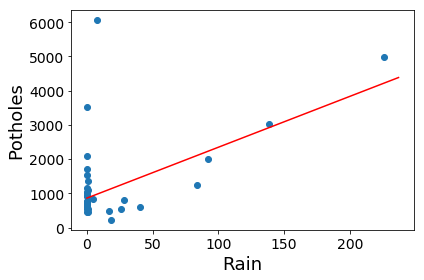

In [32]:
from scipy.stats import linregress
import numpy as np

rain, pothole = [], []
for a,b in zip(y1,y2):
    rain.append(a)
    pothole.append(b)

rain = np.array(rain)
pothole = np.array(pothole)

plt.scatter(rain,pothole)
plt.xlabel('Rain', fontsize=18)
plt.ylabel('Potholes', fontsize=18)
plt.tick_params(labelsize=14)

# remove outlier
rain2, pothole2 = [], []
for a,b in zip(y1,y2):
    if b < 6000:
        rain2.append(a)
        pothole2.append(b)

rain2 = np.array(rain2)
pothole2 = np.array(pothole2)

(slope, intercept, rvalue, _, _) = linregress(rain2, pothole2)
rain3 = np.array([0,1.05*max(rain)])
fit = slope * rain3 + intercept
plt.plot(rain3, fit, 'r-')
print(f'r-value {rvalue}')

plt.tight_layout()

plt.savefig('scatterplot_rain_pothole.png')

r-value 0.597870803127522


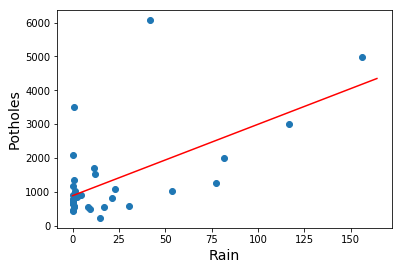

In [16]:
from scipy.stats import linregress
import numpy as np

rain, pothole = [], []
for r1, r2, p in zip(y1,y3,y2):
    rain.append( (r1+r2)/2.0 )
    pothole.append(p)

rain = np.array(rain)
pothole = np.array(pothole)

plt.scatter(rain,pothole)
plt.xlabel('Rain', fontsize=14)
plt.ylabel('Potholes', fontsize=14)

rain = np.array(rain)
pothole = np.array(pothole)

(slope, intercept, rvalue, _, _) = linregress(rain, pothole)
rain2 = np.array([0,1.05*max(rain)])
fit = slope * rain2 + intercept
plt.plot(rain2, fit, 'r-')
print(f'r-value {rvalue}')